In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [84]:
#importing the dataset

df_train= pd.read_csv('blackfriday_train.csv')
df_test= pd.read_csv('blackfriday_test.csv')


In [85]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [86]:
df_test.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0



Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


In [87]:
## merge both test and train data 
df=df_train.append(df_test,sort=False)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [88]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
User_ID                       783667 non-null int64
Product_ID                    783667 non-null object
Gender                        783667 non-null object
Age                           783667 non-null object
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Purchase                      550068 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [89]:
df.drop(['User_ID'],axis=1,inplace=True) # Dropped user ID since it is not really necessary

In [90]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [91]:
##HAndling categorical feature Gender

#pd.get_dummies(df['Gender'],drop_first=True).head()

df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()




,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [92]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [57]:
#pd.get_dummies(df['Age'],drop_first=True).head()

##second technqiue

"" "from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()""""

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1


In [93]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [94]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [141]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True).head() # converted city_category into numeric values using get_dummies

KeyError: 'City_Category'

In [96]:
df_city.head()


,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [98]:
df=df.reset_index() 
# was getting error while using concat function :InvalidIndexError: Reindexing only valid with uniquely valued Index objects
# by using reset_index issue got resolved 

In [99]:
df=pd.concat([df,df_city],axis=1)
df.head()

,index,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0.0,0.0
1,1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0.0,0.0
2,2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0.0,0.0
3,3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0.0,0.0
4,4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0.0,1.0


In [104]:
# drop city category

#df.drop('City_Category',axis=1,inplace=True)

df.head()


,index,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0.0,0.0
1,1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0.0,0.0
2,2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0.0,0.0
3,3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0.0,0.0
4,4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0.0,1.0


In [105]:
## mising valus

df.isnull().sum()

index                              0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                             783662
C                             783662
dtype: int64

In [106]:
## replacing missing values

df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [107]:
df['Product_Category_2'].unique()


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [108]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [109]:
df['Product_Category_2'].mode()[0]

8.0

In [110]:
# best way to replace discrete missing value with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])


In [111]:
df['Product_Category_2'].isnull().sum()

0

In [112]:
## replacing missing values for product category 3
df['Product_Category_3'].unique()


array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [113]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [114]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [115]:
df['Product_Category_3'].isnull().sum()

0

In [116]:
df.head()

,index,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0.0,0.0
1,1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0.0,0.0
2,2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0.0,0.0
3,3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0.0,0.0
4,4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0.0,1.0


In [117]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [129]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','') # replaced 4+ value with 4 using replace function

In [130]:
df.head()

,index,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0.0,0.0
1,1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0.0,0.0
2,2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0.0,0.0
3,3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0.0,0.0
4,4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0.0,1.0


In [131]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 13 columns):
index                         783667 non-null int64
Product_ID                    783667 non-null object
Gender                        783667 non-null int64
Age                           783667 non-null int64
Occupation                    783667 non-null int64
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Purchase                      550068 non-null float64
B                             5 non-null float64
C                             5 non-null float64
dtypes: float64(5), int64(6), object(2)
memory usage: 83.7+ MB


In [135]:
## convert object into int for 'Stay_In_Current_City_Years' column

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 13 columns):
index                         783667 non-null int64
Product_ID                    783667 non-null object
Gender                        783667 non-null int64
Age                           783667 non-null int64
Occupation                    783667 non-null int64
Stay_In_Current_City_Years    783667 non-null int32
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Purchase                      550068 non-null float64
B                             5 non-null float64
C                             5 non-null float64
dtypes: float64(5), int32(1), int64(6), object(1)
memory usage: 80.7+ MB


In [136]:
df['B'].dtypes

dtype('float64')

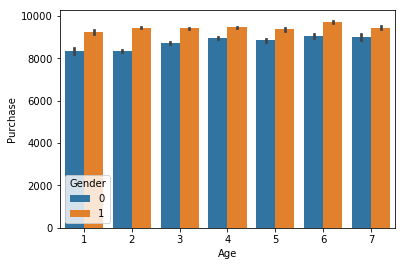

In [144]:
sns.barplot('Age','Purchase',hue='Gender',data=df) ##Visualisation


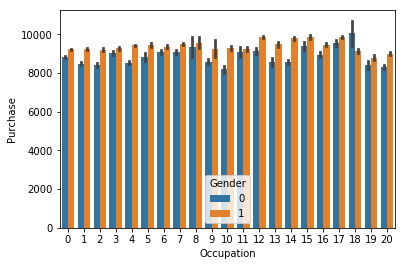

In [145]:
## Visualization of Purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

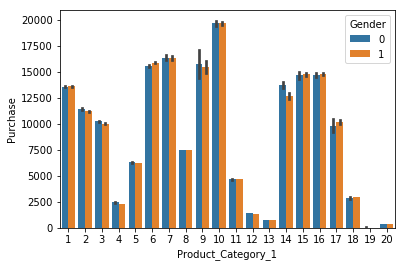

In [146]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

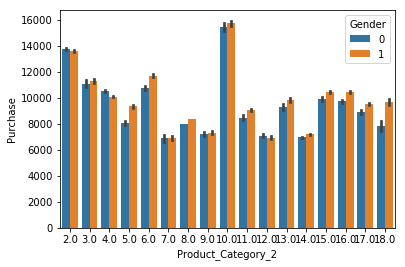

In [147]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

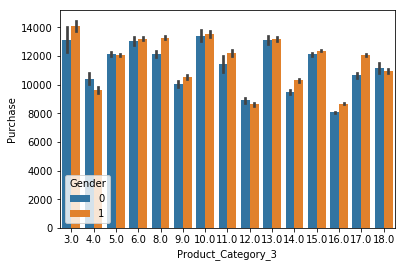

In [148]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [152]:
#Feature scaling 

df_test=df[df['Purchase'].isnull()]

In [153]:
df_test.head()

,index,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550068,0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,NaN,NaN
550069,1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,NaN,NaN
550070,2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,NaN,NaN
550071,3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,NaN,NaN
550072,4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,NaN,NaN


In [154]:
df_train=df[~df['Purchase'].isnull()]

In [155]:
df_train.head()


,index,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0.0,0.0
1,1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0.0,0.0
2,2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0.0,0.0
3,3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0.0,0.0
4,4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0.0,1.0


In [157]:
X.head()

,index,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0.0,0.0
1,1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0.0,0.0
2,2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0.0,0.0
3,3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0.0,0.0
4,4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0.0,1.0


In [162]:
X.shape

(550067, 13)

In [156]:
X=df_train[:-1]

In [160]:
Y=df_train['Purchase']

In [163]:
Y.shape

(550068,)

In [161]:
Y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
5         15227.0
6         19215.0
7         15854.0
8         15686.0
9          7871.0
10         5254.0
11         3957.0
12         6073.0
13        15665.0
14         5378.0
15         2079.0
16        13055.0
17         8851.0
18        11788.0
19        19614.0
20         8584.0
21         9872.0
22         9743.0
23         5982.0
24        11927.0
25        16662.0
26         5887.0
27         6973.0
28         5391.0
29        16352.0
           ...   
550038      596.0
550039      595.0
550040       26.0
550041      488.0
550042      243.0
550043       48.0
550044       62.0
550045      252.0
550046      236.0
550047      244.0
550048      591.0
550049      473.0
550050      368.0
550051      489.0
550052      239.0
550053      371.0
550054       60.0
550055      238.0
550056      254.0
550057       61.0
550058      121.0
550059       48.0
550060      494.0
550061      599.0
550062    

In [164]:
X=df_train.drop('Purchase',axis=1)

In [165]:
Y.shape

(550068,)

In [166]:
X.shape

(550068, 12)

In [169]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

C:\Users\Sneha\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
     X, Y, test_size=0.33, random_state=42)

In [170]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)